In [1]:
#Import des framework

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

#Framework spécifiques au NLP
import re 
import nltk
nltk.download('stopwords')
lst_stopwords = nltk.corpus.stopwords.words("french")
nltk.download('wordnet')
nltk.download('omw-1.4')

#Bibliothèques pour afficher des images et les nuages de mots-clés
import wordcloud 
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
 #Import des données
from google.colab import drive
drive.mount('/content/drive')


path = '/content/drive/MyDrive/projet_hetic/raw_datas_projet_M5D_Hetic.xlsx - All reviews.csv'
df = pd.read_csv(path,header=1)

Mounted at /content/drive


In [4]:
#Suppression des colonnes jugées inutiles ou que nous avons déjà traitées 
df.drop(['Location name','Group Id','Business Id','Timezone','Timezone','Rating','Response date','Response'],axis=1)
df.head()


,Creation date,Updated date,Business Id,Location name,Group Id,Group name,Business Code,Address,City,Zipcode,...,Response,template_used,Recommended,Response date.1,Response.1,template_used.1,Number of comments,Rating.1,Response date.2,Response.2
0,2022-05-31 23:32:47,NaN,565c8ee63440cd4d3f481a7b,Castorama,2212.0,PARIS SUD,1458,route nationale 186,Fresnes,94260,...,"Bonjour Eliza,\nMerci d'avoir pris le temps de...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-31 23:32:32,NaN,565c8ee43440cd4d3f481a1d,Castorama,2214.0,EST,1431,rue Bernard Palissy,Vandoeuvre Les Nancy,54500,...,"Bonjour,\nMerci de nous avoir informé de ce pr...",Excuses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-05-31 22:05:36,NaN,565c8ee63440cd4d3f481a67,Castorama,2212.0,PARIS SUD,1413,4 rue De La Longueraie,Vigneux Sur Seine,91270,...,"Bonjour Madame,\nNous vous remercions chaleure...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-05-31 21:56:31,NaN,565c8ee43440cd4d3f481a11,Castorama,2210.0,NORD,1461,ZAC Du Pont Loby,Dunkerque,59140,...,"Bonjour manuel,\nN'hésitez pas à nous contacte...",2/3 étoiles (sans commentaire),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-05-31 21:52:42,NaN,565c8ee53440cd4d3f481a47,Castorama,2211.0,PARIS NORD,1486,1-3 rue De Caulaincourt,Paris,75018,...,"Bonjour Parrot Jean-Louis,\nMille mercis d’avo...",4-5 étoiles (sans commentaire) (1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1) Exploration des données :

### A) Analyse des valeurs manquantes


In [5]:
#Affichage du pourcentage de donnée manquantes par colonnne
for col in df.columns :
  print('valeur manquantes de',col,': ' ,df[col].isna().sum() / df.shape[0] *100,'%')

valeur manquantes de Creation date :  0.0 %
valeur manquantes de Updated date :  84.86232893550766 %
valeur manquantes de Business Id :  0.0 %
valeur manquantes de Location name :  0.0 %
valeur manquantes de Group Id :  0.1495533885110219 %
valeur manquantes de Group name :  0.1495533885110219 %
valeur manquantes de Business Code :  0.0 %
valeur manquantes de Address :  0.0 %
valeur manquantes de City :  0.0 %
valeur manquantes de Zipcode :  0.0 %
valeur manquantes de Platform :  0.0 %
valeur manquantes de Content :  42.72719822994346 %
valeur manquantes de Deleted :  0.0 %
valeur manquantes de Timezone :  0.0 %
valeur manquantes de Rating :  0.2622305990330247 %
valeur manquantes de Response date :  4.232565762517414 %
valeur manquantes de Response :  4.232565762517414 %
valeur manquantes de template_used :  21.01532410063099 %
valeur manquantes de Recommended :  99.73776940096698 %
valeur manquantes de Response date.1 :  99.87093337703843 %
valeur manquantes de Response.1 :  99.87093

### B) Analyse des valeurs Rating et commentaire 

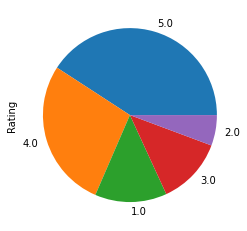

In [6]:
#Analyse de la valeur rating avec et sans commentaires
df['Rating'].value_counts().plot.pie()


In [29]:
#Analyse de la colonne Rating lorsqu'il n'y a pas de commentaires

df['Content'] = df['Content'].fillna(0)
df_na_content = df.loc[df['Content'] ==0]
df_na_content.to_csv('df_na_content.csv')
df_na_content['Rating'].value_counts().plot.pie();


KeyError: ignored

### C) Exploration des colonnes liées à la localisation




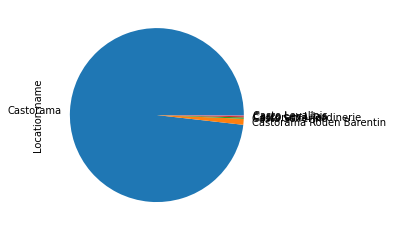

In [10]:
#Analyse de la colonne Location name
df['Location name'].value_counts().plot.pie()

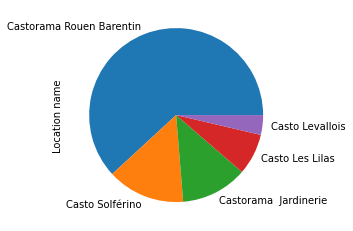

In [11]:
df_not_casto = df.loc[df['Location name'] != 'Castorama']
df_not_casto['Location name'].value_counts().plot.pie()


In [12]:
#Analyse des valeur City et Address
df['Address'].value_counts().shape[0] / df['City'].unique().shape[0] 

1.0396039603960396

In [13]:
#On réalise que la seule ville ayant plusieurs adresse est Paris 
df_paris = df.loc[df['City'] == 'Paris']
(int(df['Zipcode'].nunique()) - int(df_paris['Address'].nunique()) +1) - int(df['City'].nunique())


0

In [14]:
#Fusion de City et Adresse pour les magasins parisien
arrondissements = []
for x in df.index:
    if df['City'][x] =="Paris":
      arrondissement = df['Zipcode'][x]
      arrondissement = str(arrondissement)
      arrondissement = arrondissement[-2:]
      df['City'][x] = f'Paris {arrondissement}'

df.drop('Zipcode',axis=1, inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Creation date,Updated date,Business Id,Location name,Group Id,Group name,Business Code,Address,City,Platform,...,Response,template_used,Recommended,Response date.1,Response.1,template_used.1,Number of comments,Rating.1,Response date.2,Response.2
0,2022-05-31 23:32:47,NaN,565c8ee63440cd4d3f481a7b,Castorama,2212.0,PARIS SUD,1458,route nationale 186,Fresnes,GOOGLE_MY_BUSINESS,...,"Bonjour Eliza,\nMerci d'avoir pris le temps de...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-31 23:32:32,NaN,565c8ee43440cd4d3f481a1d,Castorama,2214.0,EST,1431,rue Bernard Palissy,Vandoeuvre Les Nancy,GOOGLE_MY_BUSINESS,...,"Bonjour,\nMerci de nous avoir informé de ce pr...",Excuses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-05-31 22:05:36,NaN,565c8ee63440cd4d3f481a67,Castorama,2212.0,PARIS SUD,1413,4 rue De La Longueraie,Vigneux Sur Seine,GOOGLE_MY_BUSINESS,...,"Bonjour Madame,\nNous vous remercions chaleure...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-05-31 21:56:31,NaN,565c8ee43440cd4d3f481a11,Castorama,2210.0,NORD,1461,ZAC Du Pont Loby,Dunkerque,GOOGLE_MY_BUSINESS,...,"Bonjour manuel,\nN'hésitez pas à nous contacte...",2/3 étoiles (sans commentaire),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-05-31 21:52:42,NaN,565c8ee53440cd4d3f481a47,Castorama,2211.0,PARIS NORD,1486,1-3 rue De Caulaincourt,Paris 18,GOOGLE_MY_BUSINESS,...,"Bonjour Parrot Jean-Louis,\nMille mercis d’avo...",4-5 étoiles (sans commentaire) (1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### D) Analyse de la colonne Plateform

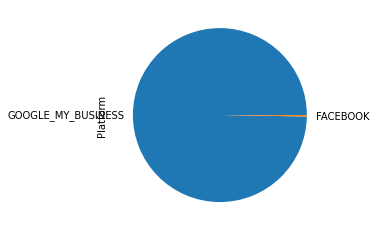

In [15]:
df['Platform'].value_counts().plot.pie()

 ### E) Analyse de la colonne  Groupe Name

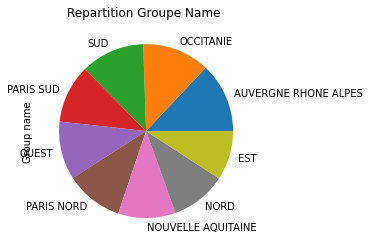

In [16]:
plt.title("Repartition Groupe Name ")
df["Group name"].value_counts().plot.pie();

In [17]:
#Remplacement De Creation date par Update Date lorsqu'elle existe 
df['Updated date'].fillna(0,inplace=True)

for x in df.index:
  if df['Updated date'][x] != 0:
     df['Creation date'][x] =  df['Updated date'][x]

df.drop(['Updated date'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Traitement des Langues

In [18]:
pip install pycld2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.4 MB 1.2 MB/s 
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9834349 sha256=1a81c7b8b2283fd6f4ea4ca7bd6b46b8a1a596e3d5bde1b5de81bfceb7b6fa9a
  Stored in directory: /root/.cache/pip/wheels/ed/e4/58/ed2e9f43c07d617cc81fe7aff0fc6e42b16c9cf6afe960b614
Successfully built pycld2


In [19]:
pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 1.4 MB 48.9 MB/s 
     |████████████████████████████████| 65 kB 3.8 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=fff54caf9fe7dccbb51046699e841b625f90bdc0dc39d59e481d5ed448988ee5
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [20]:
import pycld2 as cld2
from googletrans import Translator

tr = Translator()
len_original = len('(Original)')
languages = []

for x in df.index:
  text=df['Content'][x]

  # On vérifie que Content contient bien un commentaire
  if len(str(text)) > 1:

    # On vérifie si Content contient 2 version du texte (dans deux langues différentes)
    if '(Translated by Google)' in text :

      # On vérifie si la 2e version du texte est au début du texte
      if '(Original)' in text :
        
        #On récupère la partie du texte en doublons et on la supprime
        pos1 = text.find('(Translated by Google)')
        pos2 = text.find('(Original)')
        pos2 = pos2 + len_original
        text2=text[pos1:pos2]
        text = text.replace(text2, '')
        
        # On detected la langue et on l'ajoute à la liste languages
        detected_language = cld2.detect(text,  returnVectors=True)
        detected_language=detected_language[2][0][0]
        languages.append(detected_language)
        
        # Traduction du texte si le texte n'est pas en français
        if detected_language != 'FRENCH':
          outpout = tr.translate(text, dest='fr')
          text = outpout.text

      # Si la 2e version du texte est à la fin du texte  
      else :

        #On récupère la partie du texte en doublons et on la supprime
        pos1 = text.find('(Translated by Google)')
        len_text=len(text)
        text2=text[pos1:len_text]
        text = text.replace(text2, '')

        # On detected la langue
        detected_language = cld2.detect(text2,  returnVectors=True)

        # Si la 1ere langue détécté est Unknown on verifie la 2e
        if detected_language[2][1][0] != 'Unknown' :
          detected_language=detected_language[2][1][0]
          languages.append(detected_language)

          # Traduction du texte si le texte n'est pas en français
          if detected_language != 'FRENCH':
            outpout = tr.translate(text, dest='fr')
            text = outpout.text

        # Sinon on récupère la première langue et on l'ajoute à la liste
        else :
          detected_language=detected_language[2][0][0]
          languages.append(detected_language)

    #S'il n'existe qu'une seul version du texte
    else :
      #On detecte la langue et on l'ajoute à la liste languages
      detected_language = cld2.detect(text,  returnVectors=True)
      detected_language=detected_language[2][0][0]
      languages.append(detected_language)
   
    #On modifie le texte modifier au dataframe   
    df['Content'][x]=text
  
  # Si Content ne contient pas de texte
  else :
    languages.append('No language')

#On ajoute la colonne Langues   
df=df.assign(Langues=languages)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
df.head()

,Creation date,Business Id,Location name,Group Id,Group name,Business Code,Address,City,Platform,Content,...,template_used,Recommended,Response date.1,Response.1,template_used.1,Number of comments,Rating.1,Response date.2,Response.2,Langues
0,2022-05-31 23:32:47,565c8ee63440cd4d3f481a7b,Castorama,2212.0,PARIS SUD,1458,route nationale 186,Fresnes,GOOGLE_MY_BUSINESS,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No language
1,2022-05-31 23:32:32,565c8ee43440cd4d3f481a1d,Castorama,2214.0,EST,1431,rue Bernard Palissy,Vandoeuvre Les Nancy,GOOGLE_MY_BUSINESS,Un parking à l'image du magasin c'est à dire d...,...,Excuses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRENCH
2,2022-05-31 22:05:36,565c8ee63440cd4d3f481a67,Castorama,2212.0,PARIS SUD,1413,4 rue De La Longueraie,Vigneux Sur Seine,GOOGLE_MY_BUSINESS,"Dans un petit appartement, je bricole peu.... ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRENCH
3,2022-05-31 21:56:31,565c8ee43440cd4d3f481a11,Castorama,2210.0,NORD,1461,ZAC Du Pont Loby,Dunkerque,GOOGLE_MY_BUSINESS,0,...,2/3 étoiles (sans commentaire),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No language
4,2022-05-31 21:52:42,565c8ee53440cd4d3f481a47,Castorama,2211.0,PARIS NORD,1486,1-3 rue De Caulaincourt,Paris 18,GOOGLE_MY_BUSINESS,Un magasin avec un maximum d'articles et référ...,...,4-5 étoiles (sans commentaire) (1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRENCH


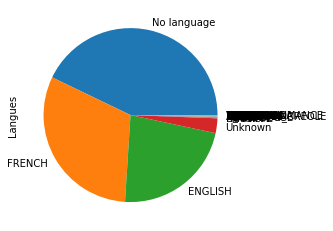

In [22]:
df['Langues'].value_counts().plot.pie()

##2. Préparation de la data

1) Suppression des majuscules et la ponctuation

2) Suppression des stop word 

3) Phase de stemming et de lemmitisation 

4) Remise en forme





In [23]:
#Fonction pour mettre au propre les textes des différentes colonne réponses 
def preprocessing_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    #supprime les majuscules et la ponctuation
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    #créer une liste avec l'ensemble du texte
    lst_text = text.split()
    #vire les stop word 
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in  lst_stopwords]
    
    # phase de stemming et de lemmitisation 
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_test = [ps.stem(word) for word in lst_text]
        
    if flg_lemm == True:
        lemm = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lemm.lemmatize(word) for word in lst_text]
        
    #remise en forme
    text = " ".join(lst_text)
    return text
    

   

In [24]:
#Application de la fonction preprocessing_text sur chacune des colonne de texte + suppression des colonnes modifiées

df['Content_clean'] = df['Content'].apply(lambda x : preprocessing_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))

df['Response_clean'] = df['Response'].apply(lambda x : preprocessing_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))

df['Response_1_clean'] = df['Response.1'].apply(lambda x : preprocessing_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))

df['Response_2_clean'] = df['Response.2'].apply(lambda x : preprocessing_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))

df['Content_clean'] = df['Content'].apply(lambda x : preprocessing_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))

df = df.drop(['Response','Response.1','Response.2','Content'],axis=1)
df.head()


,Creation date,Business Id,Location name,Group Id,Group name,Business Code,Address,City,Platform,Deleted,...,Response date.1,template_used.1,Number of comments,Rating.1,Response date.2,Langues,Content_clean,Response_clean,Response_1_clean,Response_2_clean
0,2022-05-31 23:32:47,565c8ee63440cd4d3f481a7b,Castorama,2212.0,PARIS SUD,1458,route nationale 186,Fresnes,GOOGLE_MY_BUSINESS,No,...,NaN,NaN,NaN,NaN,NaN,No language,0,bonjour eliza merci davoir pris temp noter mag...,nan,nan
1,2022-05-31 23:32:32,565c8ee43440cd4d3f481a1d,Castorama,2214.0,EST,1431,rue Bernard Palissy,Vandoeuvre Les Nancy,GOOGLE_MY_BUSINESS,No,...,NaN,NaN,NaN,NaN,NaN,FRENCH,parking limage magasin cest dire délabré vende...,bonjour merci avoir informé problème allons pr...,nan,nan
2,2022-05-31 22:05:36,565c8ee63440cd4d3f481a67,Castorama,2212.0,PARIS SUD,1413,4 rue De La Longueraie,Vigneux Sur Seine,GOOGLE_MY_BUSINESS,No,...,NaN,NaN,NaN,NaN,NaN,FRENCH,petit appartement bricole peu jy trouve toujou...,bonjour madame remercions chaleureusement reto...,nan,nan
3,2022-05-31 21:56:31,565c8ee43440cd4d3f481a11,Castorama,2210.0,NORD,1461,ZAC Du Pont Loby,Dunkerque,GOOGLE_MY_BUSINESS,No,...,NaN,NaN,NaN,NaN,NaN,No language,0,bonjour manuel nhésitez contacter 0328289832 d...,nan,nan
4,2022-05-31 21:52:42,565c8ee53440cd4d3f481a47,Castorama,2211.0,PARIS NORD,1486,1-3 rue De Caulaincourt,Paris 18,GOOGLE_MY_BUSINESS,No,...,NaN,NaN,NaN,NaN,NaN,FRENCH,magasin maximum darticles références espace tr...,bonjour parrot jeanlouis mille mercis davoir p...,nan,nan


### F) Analyse des données textuelles

In [25]:

# Génération de nuage de mots clés 
def wordcloud(df,nbr_mots:int):
#On réunit tous les mots d'une colonne dans une liste ensemble_txt
  ensemble_txt = []
  df.apply(lambda x :  ensemble_txt.append(x))
  #on regroupe les mots de cette liste  dans une seul string 
  ensemble_txt = "".join(ensemble_txt)
  #Géneration du nuage de mots avec wordcloud
  wordcloud = WordCloud(background_color = 'white', max_words = nbr_mots).generate(ensemble_txt)
  plt.imshow(wordcloud)
  plt.axis("off")
  return plt.show();

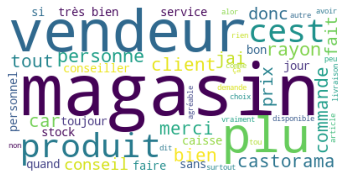

In [26]:
wordcloud(df['Content_clean'],nbr_mots=50)

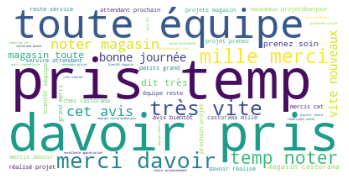

In [27]:
wordcloud(df['Response_clean'], nbr_mots=50 )

In [ ]:
#Récuperation des données traitées


#from google.colab import files
##df.to_csv('data_traite.csv') 
#files.download('data_traite.csv')